<class 'numpy.ndarray'>
训练集： 1.0
验证集： 0.28205128205128205


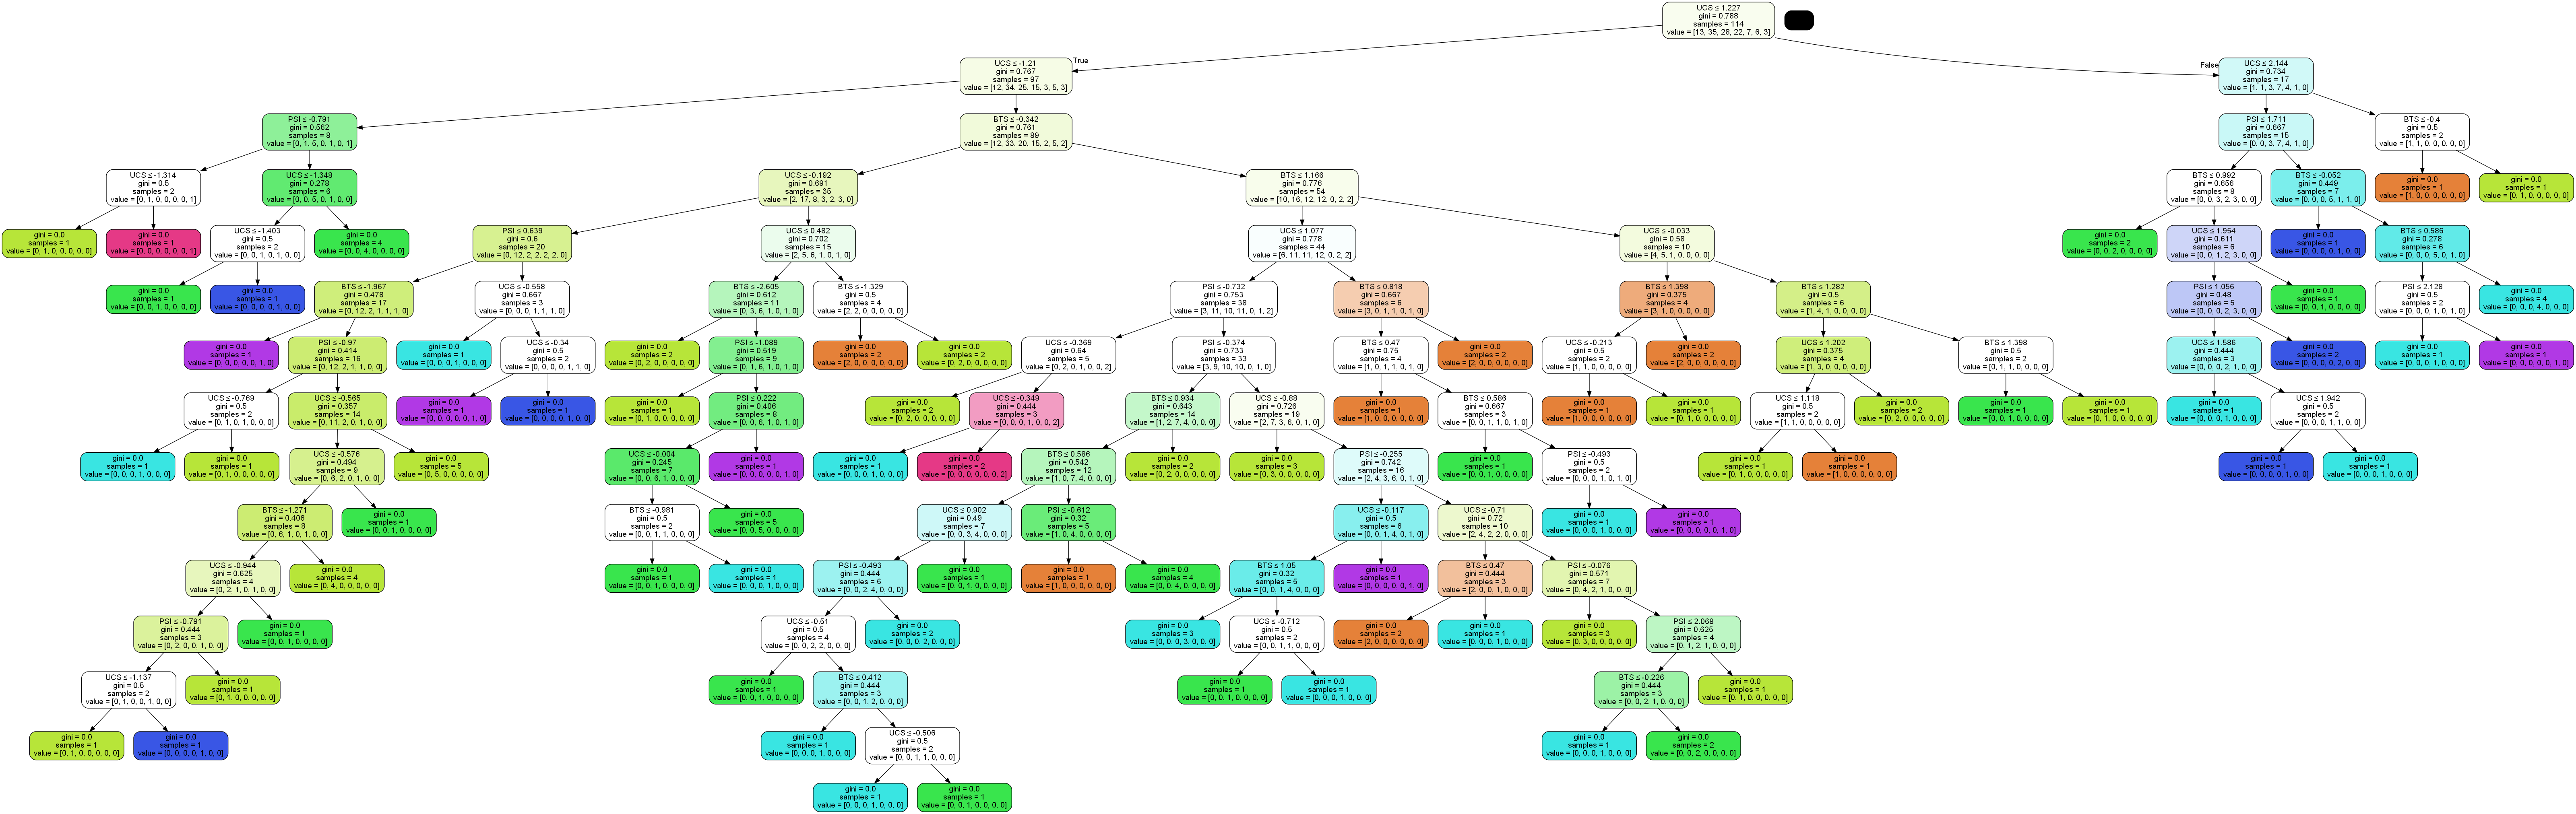

In [2]:
from imchap3.imset import *
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
import graphviz
import pydotplus
from io import StringIO
from sklearn.ensemble import *
from sklearn.tree import *
from sklearn.metrics import *
from IPython.display import Image
data1=pd.read_excel('D:/pythonjpgs/datas/queen/queen_tunel012.xlsx')
data_x=data1[['UCS','BTS','PSI']].values    # 输入
data_m=data1['m_ROP'].values    # 实际掘进速度
data_y=data1['Rock_class'].values   # 围岩等级
# 数据标准化
data_x=StandardScaler().fit_transform(data_x)

x_train,x_test,y_train,y_test = train_test_split(data_x,data_y,random_state=123)
dtc1 = DecisionTreeClassifier(random_state=123)
# 解决决策树的过拟合问题，一个方法是剪枝。
# 在DecisionTreeClassifiler()函数中，参数max_depth指定了决策树的最大树深，参数max_leaf_nodes指定了叶子结点的最大数目
dtc1.fit(x_train,y_train)
y_pre = dtc1.predict(x_test)
print(type(y_pre))
print('训练集：',accuracy_score(y_train,dtc1.predict(x_train)))
print('验证集：',accuracy_score(y_test,y_pre))
# 很明显，过拟合了
# 可视化树图：
dot_data = StringIO()
export_graphviz(
    dtc1,out_file = dot_data,
    feature_names = data1[['UCS','BTS','PSI']].columns,
    filled = True,
    rounded = True,
    special_characters = True
)   # 导出DOT格式的决策树

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())